# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from models.dmc.dmc import dmc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('../datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Instantiating model

In [3]:
dmc_model = dmc(type_distance_calc='euclidean')

# Running the tests and computing informations

In [4]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    dmc_model.fit(X_train, y_train)

    hit_rate_list.append(dmc_model.score(X_test, y_test))

    y_pred = [dmc_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [5]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.7580645161290323, 0.7419354838709677, 0.7580645161290323, 0.8225806451612904, 0.8064516129032258, 0.8387096774193549, 0.7903225806451613, 0.8064516129032258, 0.7903225806451613, 0.7903225806451613, 0.7419354838709677, 0.7903225806451613, 0.8548387096774194, 0.8387096774193549, 0.6935483870967742, 0.7419354838709677, 0.7903225806451613, 0.7258064516129032, 0.7741935483870968, 0.8387096774193549]

Accuracy:
0.7846774193548387

Standard Deviation:
0.04183455596562238

Confusion Matrix:
[[10  3  0]
 [ 6 11  1]
 [ 2  3 26]]
[[ 7  1  0]
 [10 13  0]
 [ 3  2 26]]
[[ 8  3  0]
 [ 7 18  0]
 [ 4  1 21]]
[[ 9  3  0]
 [ 4 10  0]
 [ 0  4 32]]
[[13  1  0]
 [ 9  9  0]
 [ 1  1 28]]
[[11  0  0]
 [ 7 14  0]
 [ 1  2 27]]
[[ 7  2  0]
 [ 4  9  1]
 [ 2  4 33]]
[[ 7  0  0]
 [ 4 11  1]
 [ 2  5 32]]
[[15  2  0]
 [ 6 15  0]
 [ 1  4 19]]
[[ 6  2  0]
 [ 7  9  0]
 [ 1  3 34]]
[[ 8  1  0]
 [ 7  7  1]
 [ 2  5 31]]
[[ 9  3  0]
 [ 5 13  0]
 [ 2  3 27]]
[[ 7  1  0]
 [ 5 15  0]
 [ 1  2 31]]
[[12  0  0]
 [ 3 1

# Choosing two columns from the last X_train and X_test to plot decision surface

In [6]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
157  44.22   1.51
132  69.63  21.12
241  51.53  13.52
68   72.08  18.95
146  85.58  30.46
..     ...    ...
296  39.66  16.21
117  86.04  38.75
130  50.07   9.12
95   57.52  33.65
169  44.25   1.10

[248 rows x 2 columns]
Test dataset:
         0      1
195  71.24   5.27
25   54.12  26.65
149  79.25  23.94
50   55.29  20.44
177  80.82  19.24
..     ...    ...
48   40.56  17.98
78   67.41  17.44
75   70.22  39.82
276  51.33  13.63
148  65.76   9.83

[62 rows x 2 columns]


# Training the model with the new dataset 2d

In [7]:
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)

# Plotting decision surface

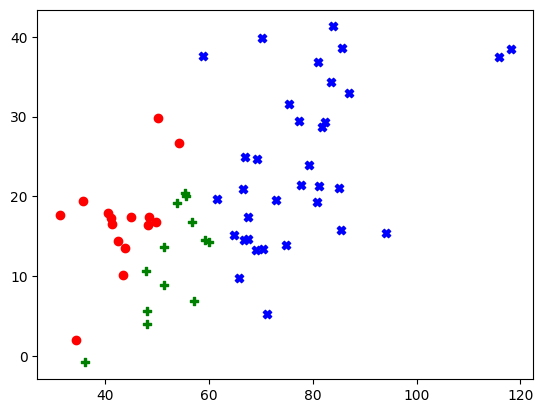

In [8]:
data = X_test_2d[:][:].values

y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

dh = np.where(y_pred == 'DH')
sl = np.where(y_pred == 'SL')
no = np.where(y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='green', marker='P', label='no')

plt.show()